# Simple demonstration of p-value and confidence interval

In [1]:
# import Packages
include("src/data.jl")
using .DataUtil
include("src/forward_stepwise/selective_inference.jl")
using .SIforSFS
using Distributions
using LinearAlgebra: I
using ProgressMeter

In [2]:
# setting seed
using Random; Random.seed!(1);

In [3]:
# parameters
N = 100;
β₀ = 0.0;
𝛃 = [0.25, 0.5, 1, zeros(7)...];
K = 5;

In [13]:
# generate data
𝐗, 𝐲_obs = centering(make_dataset(β₀, 𝛃, N)...);

In [14]:
# observe the set of selected features and their corresponding selective p-value by (proposed) Homotopy method
A_obs, p_values_homotopy = parametric_SFS_SI(𝐗, 𝐲_obs, K, I)

([3, 2, 1, 6, 9], [NaN, 1.0278517570405654e-7, 0.0754923375787393, 0.5122747748075127, 0.716440232629564])

In [15]:
# observe the set of selected features and their corresponding selective p-value by (existing) Polytope method
A_obs, p_values_polytope = parametric_SFS_SI(𝐗, 𝐲_obs, K, I; selection_event=ActiveSignOrder())

([3, 2, 1, 6, 9], [NaN, 1.0604870863684113e-6, 0.3998496552131794, 0.6624027127512406, 0.5740455797860884])

In [16]:
# observe the set of selected features and their corresponding selective Confidence Interval (CI) by (proposed) Homotopy method
_, CIs_homotopy = parametric_SFS_CI(𝐗, 𝐲_obs, K, I; α=0.05)

([3, 2, 1, 6, 9], IntervalSets.Interval{:closed,:closed,Float64}[0.7762128200818754..1.2220257232180711, 0.36694683162272435..0.749372056169467, -0.013534692472013369..0.44608434890837767, -0.06201456540330211..0.3200907341150811, -0.07991788361766063..0.3502363565796471])

In [17]:
# observe the set of selected features and their corresponding selective Confidence Interval (CI) by (existing) Polytope method
_, CIs_polytope = parametric_SFS_CI(𝐗, 𝐲_obs, K, I; selection_event=ActiveSignOrder(), α=0.05)

([3, 2, 1, 6, 9], IntervalSets.Interval{:closed,:closed,Float64}[0.7762533698532001..1.2671950145630824, 0.3638078352853074..0.7493719779593134, -0.35534696600694826..0.4407441168455125, -1.5929252114619932..0.7031227453773851, -1.2008875579287048..2.6052706901281617])

In [18]:
# plot setting
using Plots

function point!(x, y; kwargs...) # plot 1 data point
    scatter!([x], [y]; kwargs...)
end

function stem!(x, y_min, y_max; kwargs...) # plot x = x line
    plot!([x, x], [y_min, y_max]; kwargs...)
end

A_sort = sort(A_obs)
function plot_CI(𝐴_obs, CIs; color=:red, shift=0, label="", kwargs...)
    for (i, j) ∈ enumerate(𝐴_obs)
        for (i′, j′) ∈ enumerate(A_sort)
            j == j′ || continue
            stem!(i′ + shift, CIs[i].left, CIs[i].right; color=color, label=(i == length(𝐴_obs) ? label : nothing))
            point!(i′ + shift, 𝛃[j]; color=color, label=nothing)
            plot!(; kwargs...)
        end
    end
end

plot_CI (generic function with 1 method)

In [19]:
plot(; xticks=(1:length(A_sort), A_sort));

In [20]:
# plot CIs for Homotopy and Polytope methods
plot_CI(A_obs, CIs_homotopy; shift=0, color=1, label="Homotopy")
plot_CI(A_obs, CIs_polytope; shift=0.1, color=2, label="Polytope")

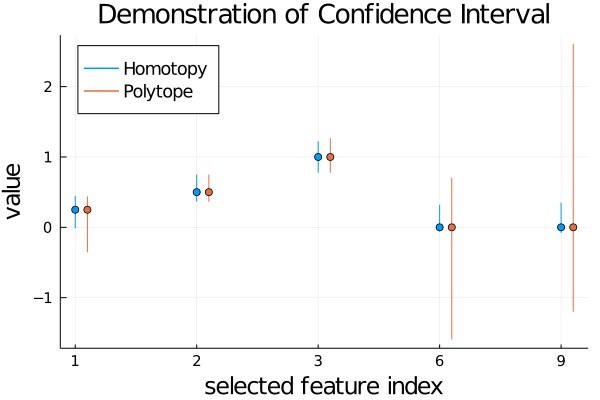

In [21]:
plot!(; guidefontsize=16, legendfontsize=12, tickfontsize=10)
plot!(; xlabel="selected feature index", ylabel="value", legend=:topleft)
plot!(; title="Demonstration of Confidence Interval", titlefontsize=18)

The proposed homotopy method has shorter CIs than polytope method because the homotopy-based SI is minimum-conditioned.